# Working (hopefully) example for Transfer function fit

## Toy model data generation

Considero una funzione di trasferimento $H(s)$ per un filtro passa basso, genero quindi inizialmente un set finito di dati con un errore, dati sperimentali ottenuti dal problema E1/R1


In [9]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import lmfit



from uncertainties import ufloat, unumpy

datafile = open('toymodel_data.txt')

data = np.loadtxt(datafile)
data = data.transpose()


m_data = data[0]
m_data_err = data[1]
p_data = data[2] 
p_data_err = data[3]
f_data = data[4] 
f_data_err = data[5]

H_toymodel = m_data*np.exp(p_data*1j)

def to_db(a):  # pylint: disable=invalid-name
    """Convert the input array into decibels
    Parameters
    ----------
    a : `float`, `numpy.ndarray`
        value or array of values to convert to decibels
    Returns
    -------
    dB : ``10 * numpy.log10(a)``
    Examples
    --------
    >>> to_db(1000)
    30.0
    """
    return 10 * np.log10(a)

def to_db_err(a,err_a):  # pylint: disable=invalid-name
    """Convert the input array into decibels
    Parameters
    ----------
    a : `float`, `numpy.ndarray`
        value or array of values to convert to decibels
    err_a : `float`, `numpy.ndarray`
        value or array of uncertainties to convert to decibels
    Returns
    -------
    err_dB : ``err(10 * numpy.log10(a))``
    """
    return 10 * err_a / ( a * np.log(10) )


Text(0, 0.5, 'Phase (rad)')

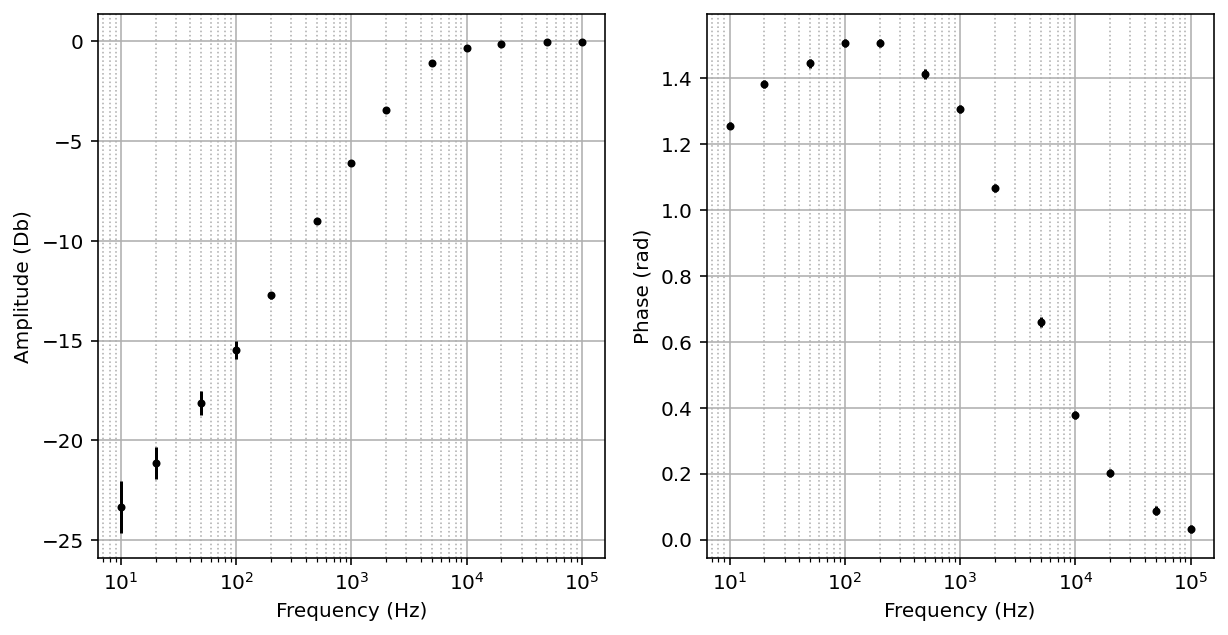

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.errorbar(f_data,to_db(np.abs(H_toymodel)), to_db_err(np.abs(H_toymodel),m_data_err),fmt='.',color='k')
ax2.errorbar(f_data,np.angle(H_toymodel),p_data_err,fmt='.',color='k')

ax1.semilogx()
#ax1.semilogy()
ax1.grid()
ax1.grid(which='minor',linestyle=':')
ax2.semilogx()
ax2.grid()
ax2.grid(which='minor',linestyle=':')

ax1.set_xlabel('Frequency (Hz)')
ax2.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Amplitude (Db)')
ax2.set_ylabel('Phase (rad)')


In [11]:

H = lambda s, f_0: 1/(1+f_0/(1j*s))
s = np.logspace(np.log10(data[4].min()), np.log10(data[4].max()),1000)

class HighPass(lmfit.model.Model):
    __doc__ = 'High-pass filter model' + lmfit.models.COMMON_INIT_DOC
    
    def __init__(self, *args, **kwargs):
        super().__init__(H, *args, **kwargs)
        
    
model = HighPass()


par = model.make_params(f_0=3e3)

fit = model.fit(H_toymodel, params=par, s=f_data, verbose=True)
print(fit.fit_report())
fit.params.pretty_print()

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 11
    # data points      = 26
    # variables        = 1
    chi-square         = 0.00102974
    reduced chi-square = 4.1189e-05
    Akaike info crit   = -261.550267
    Bayesian info crit = -260.292170
[[Variables]]
    f_0:  3951.32185 +/- 31.8198233 (0.81%) (init = 3000)
Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
f_0      3951     -inf      inf    31.82     True     None     None


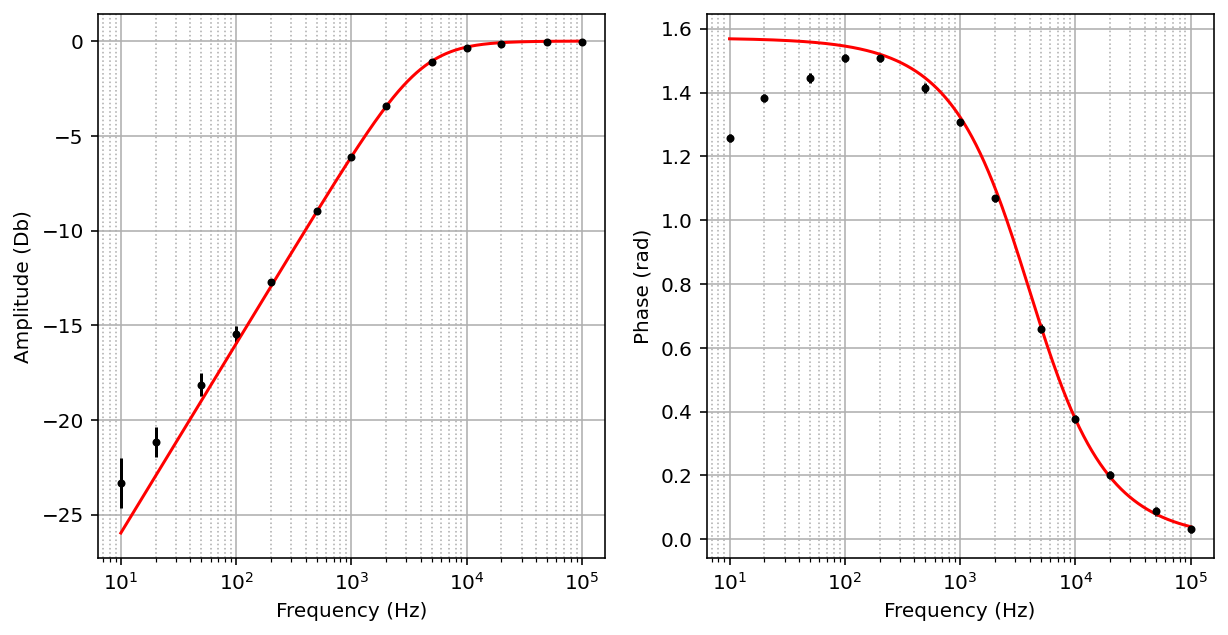

In [12]:
fit_model = model.eval(params=fit.params, s=s)

ax1.plot(s, to_db(np.abs(fit_model)), color='r')
ax2.plot(s, np.angle(fit_model), color='r')
fig

In [13]:
fig.savefig('toymodel_data_highpass.pdf',bbox_inches='tight')

# Todo

[!!] Utilizzare _stderr_ (uncertainty) di ogni punto per pesare (`weights != None`) la funzione di LeastSquare per il fit, quindi trovare un modo di propagare l'errore dalla fase e apmpiezza alla funzione a variabili complesse)

[ ] classe: costruita per avere i filtri principali facili ma anche per poter utilizzare una funzione di trasferimento qualunque. 